### 폰트

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())


print ('설정파일 위치: ', mpl.matplotlib_fname())


font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list))

font_list

버전:  3.7.1
설치 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib
설정파일 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/matplotlibrc
29


['/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationS

In [3]:
# seabron으로 그래프 스타일 설정
import seaborn as sns

"""
아래 5개중 원하는 그래프 스타일 설정.
"""
# sns.set_style('whitegrid')
sns.set_style('darkgrid')
# sns.set_style('dark')
# sns.set_style('white')
# sns.set_style('ticks')

#----------------------------------------------------위 아래가 아예 다른내용이지만, seaborn설정후 폰트적용 셀을 매번 꼭 다시 실행해줘야하기에 셀을 붙여놨습니다.

# matplot으로 한글 font 설정
import matplotlib
import matplotlib.pyplot as plt

# 한글 폰트 사용시 글자를 선명하게
%config InlineBackend.figure_format = 'retina'

# '-' 음수 부호 보이게 설정
matplotlib.rc('axes', unicode_minus=False)

# 한글 폰트 설치
# plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family='NanumGothic')

### 라이브러리 호출

In [4]:
# 연산 처리  패키지
import pandas as pd
import numpy as np
import math

# 전처리 패키지
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, SMOTENC

# 모델 패키지
from sklearn.linear_model import LogisticRegression, LinearRegression

# 평가지표 패키지
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, mean_squared_error, precision_score, recall_score

# 시각화 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프 설정
%matplotlib inline

# 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

### Data 불러오기

In [5]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')

### dataframe 이름 넣기 ###
### 여기에서 데이터셋 수정 ###
data_name = "2111211"

# 데이터 읽어오기
df = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/LR/LR최종/결과/LR_{data_name}_파생변수.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df

,여성,외산,1인 및 지정1인,가족 및 지정1인,가족및형제자매한정,가족한정(형제자매제외),기명피보험자1인한정,누구나(기본),부부 및 지정1인,부부한정,...,미가입.1,차량경과numeric,마일리지numeric,성별전년도사고율,특약전년도사고율,연령대예측사고율,TAAS성별예측사고율,성별예측사고율,특약예측사고율,사고유무
0,True,False,False,False,False,True,False,False,False,False,...,False,7.80,15,0.155036,0.16,0.005510,0.003425,0.025433,0.087615,1
1,True,False,False,False,False,False,False,True,False,False,...,False,3.16,0,0.155036,0.12,0.005510,0.003425,0.025433,0.055043,1
2,True,False,False,False,False,True,False,False,False,False,...,True,12.86,0,0.155036,0.16,0.005510,0.003425,0.025433,0.087615,0
3,True,False,False,False,False,True,False,False,False,False,...,False,3.16,15,0.155036,0.16,0.005510,0.003425,0.025433,0.087615,0
4,True,False,False,False,False,True,False,False,False,False,...,False,3.16,15,0.155036,0.16,0.005510,0.003425,0.025433,0.087615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187978,False,False,False,False,False,False,False,False,False,True,...,True,3.16,15,0.129267,0.11,0.033873,0.008801,0.040210,0.043751,0
187979,False,False,False,False,False,False,False,True,False,False,...,False,12.86,15,0.129267,0.12,0.033873,0.008801,0.040210,0.055043,0
187980,False,False,False,False,False,True,False,False,False,False,...,False,3.16,0,0.129267,0.16,0.033873,0.008801,0.040210,0.087615,1
187981,False,False,False,False,False,False,False,True,False,False,...,True,12.86,7,0.129267,0.12,0.033873,0.008801,0.040210,0.055043,0


### Model 함수 정의

In [7]:
# 로지스틱 회귀 그리드서치
def logistic_gridsearch(X, y):

    # 하이퍼파라미터 그리드 설정
    param_grid = {
        'C': [0.1, 1, 10],
        'class_weight' : ['balanced', 'None']
    }

    # 저장 list
    auc = []

    acc = []
    prec = []
    rec = []
    f1 = []
    spec =  []

    opt_acc = []
    opt_prec = []
    opt_rec = []
    opt_f1 = []
    opt_spec = []

    opt_thres = []
    best_param = []

    # 멈추는 경우를 방지하려면 range 조절
    for i in range(100):

        # smote 전 data type 변환
        bool_mask = X.dtypes == np.bool_
        bool_cols = X.columns[bool_mask].tolist()

        for col_name in bool_cols:
            X[col_name] = X[col_name].astype(int)

        # y 범주 비율에 맞춰 train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

        # 데이터 Random Sampling
        X_train_rd = X_train.sample(n = 15000)
        y_train_rd = y_train[X_train_rd.index]

        # SMOTE oversampling
        smt = SMOTE(sampling_strategy = 'auto')
        X_train_sm, y_train_sm = smt.fit_resample(X_train_rd, y_train_rd)

        # GridSearchCV를 사용한 하이퍼파라미터 튜닝
        CV_lr = GridSearchCV(LogisticRegression(n_jobs = -1), param_grid = param_grid, cv = 5, scoring = 'roc_auc')
        CV_lr.fit(X_train_sm, y_train_sm)

        # 최적의 파라미터 저장
        best_param.append(CV_lr.best_params_)

        # 테스트 데이터셋에 대한 예측 수행
        y_pred = CV_lr.predict(X_test)

        # AUC 계산, threshold 기준 평가를 위한 발생 확률 계산
        y_proba = CV_lr.predict_proba(X_test)[:, 1]

        # 기본 평가지표
        auc.append(roc_auc_score(y_test, y_proba))

        acc.append(accuracy_score(y_test, y_pred))
        prec.append(precision_score(y_test, y_pred))
        rec.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        spec.append((tn / (tn + fp)))

        # 최적 threshold 값 & 그 때의 FPR 출력
        fper, tper, thresholds = roc_curve(y_test, y_proba)  # thresholds 별 fpr tpr 계산
        optimal_idx = np.argmax(tper - fper)                 # fpr, tpr 간 차이가 가장 클 때의 index 저장
        optimal_threshold = thresholds[optimal_idx]

        # 최적 threshold 평가지표
        y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

        opt_acc.append(accuracy_score(y_test, y_optpred))
        opt_prec.append(precision_score(y_test, y_optpred))
        opt_rec.append(recall_score(y_test, y_optpred))
        opt_f1.append(f1_score(y_test, y_optpred, average='weighted'))

        tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_optpred).ravel()
        opt_spec.append((tn2 / (tn2 + fp2)))

        opt_thres.append(thresholds[optimal_idx])

        # 횟수 출력
        print(f"{i+1}번째 완료")

        # 결과 DataFrame 생성
        if((i+1)%5 == 0) :
            result = pd.DataFrame({
                'auc' : auc,
                'accuracy' : acc,
                'precision' : prec,
                'recall' : rec,
                "f1-score" : f1,
                "specificity" : spec,
                'opt_accuracy' : opt_acc,
                'opt_precision' : opt_prec,
                'opt_recall' : opt_rec,
                "opt_f1-score" : opt_f1,
                "opt_specificity" : opt_spec,
                "best_params" : best_param,
                "opt_threshold" : opt_thres
            })

            result.to_csv(f"/content/drive/MyDrive/기계학습의이해/LR/LR최종/결과/LR_{data_name}_튜닝.csv", index = False)

    return result

### 튜닝 모델 실행

In [8]:
yn_X = df.drop(columns = ['사고유무'], axis = 1)
yn_y = df['사고유무']

In [9]:
# 처음 시작할 때
total = pd.DataFrame()

# 이미 실행한 게 있을 경우
# total = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/LR/LR최종/결과/LR_{data_name}_튜닝.csv")

df_result = logistic_gridsearch(yn_X, yn_y)
df_result
# df_result = pd.read_csv(f"/content/drive/MyDrive/기계학습의이해/LR/LR최종/결과/LR_{data_name}_튜닝.csv")

# df_result.to_csv(f"/content/drive/MyDrive/기계학습의이해/LR/LR최종/결과/LR_{data_name}_튜닝.csv", index = False)

1번째 완료
2번째 완료
3번째 완료
4번째 완료
5번째 완료
6번째 완료
7번째 완료
8번째 완료
9번째 완료
10번째 완료
11번째 완료
12번째 완료
13번째 완료
14번째 완료
15번째 완료
16번째 완료
17번째 완료
18번째 완료
19번째 완료
20번째 완료
21번째 완료
22번째 완료
23번째 완료
24번째 완료
25번째 완료
26번째 완료
27번째 완료
28번째 완료
29번째 완료
30번째 완료
31번째 완료
32번째 완료
33번째 완료
34번째 완료
35번째 완료
36번째 완료
37번째 완료
38번째 완료
39번째 완료
40번째 완료
41번째 완료
42번째 완료
43번째 완료
44번째 완료
45번째 완료
46번째 완료
47번째 완료
48번째 완료
49번째 완료
50번째 완료
51번째 완료
52번째 완료
53번째 완료
54번째 완료
55번째 완료
56번째 완료
57번째 완료
58번째 완료
59번째 완료
60번째 완료
61번째 완료
62번째 완료
63번째 완료
64번째 완료
65번째 완료
66번째 완료
67번째 완료
68번째 완료
69번째 완료
70번째 완료
71번째 완료
72번째 완료
73번째 완료
74번째 완료
75번째 완료
76번째 완료
77번째 완료
78번째 완료
79번째 완료
80번째 완료
81번째 완료
82번째 완료
83번째 완료
84번째 완료
85번째 완료
86번째 완료
87번째 완료
88번째 완료
89번째 완료
90번째 완료
91번째 완료
92번째 완료
93번째 완료
94번째 완료
95번째 완료
96번째 완료
97번째 완료
98번째 완료
99번째 완료
100번째 완료


,auc,accuracy,precision,recall,f1-score,specificity,opt_accuracy,opt_precision,opt_recall,opt_f1-score,opt_specificity,best_params,opt_threshold
0,0.580230,0.814400,0.193222,0.105898,0.790572,0.928680,0.551480,0.168932,0.568748,0.620124,0.548695,"{'C': 0.1, 'class_weight': 'balanced'}",0.157987
1,0.583454,0.817539,0.188593,0.094983,0.790934,0.934085,0.499880,0.166167,0.647262,0.571601,0.476108,"{'C': 0.1, 'class_weight': 'balanced'}",0.141854
2,0.582372,0.820757,0.187988,0.087514,0.791776,0.939027,0.503205,0.166435,0.642857,0.574878,0.480680,"{'C': 0.1, 'class_weight': 'balanced'}",0.135229
3,0.577637,0.816156,0.193619,0.102260,0.791142,0.931305,0.500439,0.164821,0.638453,0.572366,0.478178,"{'C': 1, 'class_weight': 'balanced'}",0.114053
4,0.583828,0.814506,0.179121,0.093642,0.788879,0.930780,0.550044,0.171950,0.586940,0.618697,0.544093,"{'C': 10, 'class_weight': 'balanced'}",0.134285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.579789,0.816448,0.186871,0.095940,0.790406,0.932664,0.431018,0.162281,0.743968,0.497940,0.380541,"{'C': 0.1, 'class_weight': 'balanced'}",0.116066
96,0.581110,0.810357,0.195597,0.117388,0.789625,0.922131,0.564354,0.171447,0.557449,0.631380,0.565467,"{'C': 10, 'class_weight': 'balanced'}",0.134438
97,0.578372,0.808416,0.189206,0.115473,0.788152,0.920185,0.494694,0.164981,0.649560,0.566574,0.469714,"{'C': 1, 'class_weight': 'balanced'}",0.119745
98,0.576174,0.821050,0.190123,0.088472,0.792101,0.939212,0.574328,0.170879,0.536002,0.639950,0.580510,"{'C': 0.1, 'class_weight': 'balanced'}",0.160311


### 결과 확인

In [10]:
df_result.sort_values(by=["auc"], ascending = False)

,auc,accuracy,precision,recall,f1-score,specificity,opt_accuracy,opt_precision,opt_recall,opt_f1-score,opt_specificity,best_params,opt_threshold
30,0.588231,0.818283,0.201409,0.103983,0.792709,0.933498,0.487406,0.167125,0.675412,0.558729,0.457081,"{'C': 0.1, 'class_weight': 'balanced'}",0.136487
76,0.587231,0.815384,0.187341,0.098621,0.790142,0.930996,0.532250,0.170610,0.613175,0.602436,0.519197,"{'C': 1, 'class_weight': 'balanced'}",0.137293
31,0.586976,0.818975,0.196086,0.097855,0.792242,0.935290,0.516956,0.168995,0.632516,0.588030,0.498317,"{'C': 0.1, 'class_weight': 'balanced'}",0.146117
86,0.586126,0.823310,0.196238,0.087897,0.793390,0.941931,0.573051,0.174031,0.553619,0.638846,0.576185,"{'C': 0.1, 'class_weight': 'balanced'}",0.166828
21,0.585880,0.806820,0.191971,0.121792,0.787982,0.917313,0.567200,0.175038,0.569897,0.633779,0.566764,"{'C': 1, 'class_weight': 'balanced'}",0.131934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.569509,0.815969,0.181374,0.092493,0.789605,0.932664,0.550842,0.167076,0.560513,0.619631,0.549282,"{'C': 1, 'class_weight': 'balanced'}",0.146404
70,0.568792,0.808442,0.176259,0.103217,0.786508,0.922193,0.551799,0.166810,0.557449,0.620491,0.550888,"{'C': 1, 'class_weight': 'balanced'}",0.129795
14,0.568531,0.818736,0.187770,0.091727,0.791183,0.936000,0.569088,0.167806,0.531023,0.635506,0.575228,"{'C': 0.1, 'class_weight': 'balanced'}",0.156620
90,0.565270,0.817432,0.180793,0.089046,0.789984,0.934919,0.482140,0.159985,0.641900,0.554663,0.456371,"{'C': 0.1, 'class_weight': 'balanced'}",0.146166


### Best Parameter로 threshold 찾기


In [11]:
# 로지스틱 회귀 함수
def logistic_threshold(X, y):

    # 평가지표 list
    auc = []

    acc_opt = []
    prec_opt = []
    recall_opt = []

    opt_thres = []

    # 멈추는 경우를 방지하려면 range 조절
    for i in range(100):

        # smote 전 data type 변환
        bool_mask = X.dtypes == np.bool_
        bool_cols = X.columns[bool_mask].tolist()

        for col_name in bool_cols:
            X[col_name] = X[col_name].astype(int)

        # y 범주 비율에 맞춰 train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

        # 데이터 Random Sampling
        X_train_rd = X_train.sample(n = 15000)
        y_train_rd = y_train[X_train_rd.index]

        # SMOTE oversampling
        smt = SMOTE(sampling_strategy = 'auto')
        X_train_sm, y_train_sm = smt.fit_resample(X_train_rd, y_train_rd)

        # LogisticRegression 초기화
        model = LogisticRegression(
            C = 0.1,
            class_weight = 'balanced',
            n_jobs = -1
        )

        # 모델 학습
        model.fit(X_train, y_train)

        # 테스트 데이터셋에 대한 예측 수행
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        # Optimal thr 저장
        fper, tper, thresholds = roc_curve(y_test, y_proba)
        optimal_idx = np.argmax(tper - fper)   # fpr, tpr 간 차이가 가장 클 때의 index 저장

        # Optimal thr일 때 평가지표 저장
        y_optpred = (y_proba > thresholds[optimal_idx]).astype(int)

        auc.append(roc_auc_score(y_test, y_proba))

        acc_opt.append(accuracy_score(y_test, y_optpred))
        prec_opt.append(precision_score(y_test, y_optpred))
        recall_opt.append(recall_score(y_test, y_optpred))

        opt_thres.append(thresholds[optimal_idx])

        # 횟수 출력
        if ((i+1)%5 == 0) :
            print(f"{i+1}번째 완료")

    # 결과 DataFrame 생성
    results = pd.DataFrame({
        'auc': auc,
        'accuracy' : acc_opt,
        'precision' : prec_opt,
        'recall' : recall_opt,
        'threshold' : opt_thres
    })

    return results

In [12]:
thr = logistic_threshold(yn_X, yn_y)
thr

5번째 완료
10번째 완료
15번째 완료
20번째 완료
25번째 완료
30번째 완료
35번째 완료
40번째 완료
45번째 완료
50번째 완료
55번째 완료
60번째 완료
65번째 완료
70번째 완료
75번째 완료
80번째 완료
85번째 완료
90번째 완료
95번째 완료
100번째 완료


,auc,accuracy,precision,recall,threshold
0,0.603174,0.588451,0.181942,0.561471,0.505079
1,0.599944,0.551986,0.176376,0.606473,0.492054
2,0.603519,0.589462,0.182491,0.562045,0.503871
3,0.600791,0.601537,0.182055,0.535044,0.509733
4,0.602525,0.558795,0.178199,0.602643,0.494956
...,...,...,...,...,...
95,0.606196,0.608160,0.185099,0.535236,0.510832
96,0.601599,0.533340,0.172870,0.623516,0.485992
97,0.608266,0.525494,0.175463,0.653198,0.481706
98,0.601123,0.643429,0.190328,0.481616,0.523670


In [13]:
thres_value = thr['threshold'].median()
thres_value

0.5023725045466176

### test 결과 생성

In [14]:
# 로지스틱 회귀 함수
def logistic_test(X_train, X_test, y_train, y_test, thres_value):

    # smote 전 data type 변환
    bool_mask = X_train.dtypes == np.bool_
    bool_cols = X_train.columns[bool_mask].tolist()

    for col_name in bool_cols:
        X_train[col_name] = X_train[col_name].astype(int)
        X_test[col_name] = X_test[col_name].astype(int)

    # SMOTE oversampling
    smt = SMOTE(sampling_strategy = 'auto')
    X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

    # LogisticRegression 초기화
    model = LogisticRegression(
        C = 0.1,
        class_weight = 'balanced',
        n_jobs = -1
    )

    # 모델 학습
    model.fit(X_train, y_train)

    # 테스트 데이터셋에 대한 예측 수행
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 기본 평가지표
    auc = roc_auc_score(y_test, y_proba)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)

    # 최적 threshold 평가지표
    y_optpred = (y_proba > thres_value).astype(int)

    opt_accuracy = accuracy_score(y_test, y_optpred)
    opt_precision = precision_score(y_test, y_optpred)
    opt_recall = recall_score(y_test, y_optpred)
    opt_f1 = f1_score(y_test, y_optpred, average='weighted')

    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_optpred).ravel()
    opt_specificity = tn2 / (tn2 + fp2)

    return auc, accuracy, recall, precision, f1, specificity, opt_accuracy, opt_recall, opt_precision, opt_f1, opt_specificity, y_proba, y_optpred

In [15]:
# 총 188168 개의 데이터 확인
# 전처리 했기에 null값 없는거 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187983 entries, 0 to 187982
Data columns (total 45 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   여성            187983 non-null  bool   
 1   외산            187983 non-null  bool   
 2   1인 및 지정1인     187983 non-null  bool   
 3   가족 및 지정1인     187983 non-null  bool   
 4   가족및형제자매한정     187983 non-null  bool   
 5   가족한정(형제자매제외)  187983 non-null  bool   
 6   기명피보험자1인한정    187983 non-null  bool   
 7   누구나(기본)       187983 non-null  bool   
 8   부부 및 지정1인     187983 non-null  bool   
 9   부부한정          187983 non-null  bool   
 10  임직원한정         187983 non-null  bool   
 11  미가입           187983 non-null  bool   
 12  연령대           187983 non-null  int64  
 13  C             187983 non-null  bool   
 14  D             187983 non-null  bool   
 15  N             187983 non-null  bool   
 16  Z             187983 non-null  bool   
 17  10년이하         187983 non-null  bool   
 18  5년이하

In [16]:
rows = len(df)

# 행 개수의 절반을 계산하고 정수로 변환
half_rows = rows // 2

# 데이터프레임을 절반으로 나누기
train_df = df.iloc[:half_rows]
test_df = df.iloc[half_rows:]

print("trainset 데이터 갯수: ",len(train_df)) # 94804개 확인
print("testset 데이터 갯수: ", len(test_df)) #94804개 확인


# y값 비율 잘 섞였는지 확인 -> 필요한가? 일단 비율은 비슷함
print("\n========train set y값 비율==============")
print(train_df['사고유무'].value_counts())
print("========test set y값 비율==============")
print(test_df['사고유무'].value_counts())

trainset 데이터 갯수:  93991
testset 데이터 갯수:  93992

========train set y값 비율==============
사고유무
0    81123
1    12868
Name: count, dtype: int64
========test set y값 비율==============
사고유무
0    80750
1    13242
Name: count, dtype: int64


In [17]:
# train X, y 데이터셋 만들기
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

X_train = train_df.drop(columns=['사고유무'])
y_train = train_df['사고유무']

In [18]:
# test data 생성
test_dfs = []
for i in range(100):
    # 각 반복마다 다른 랜덤 시드 설정 0~99
    np.random.seed(i)

    # 데이터프레임에서 임의의 10000개 행 추출
    sample_df = test_df.sample(n=10000)

    # 결과 확인
    test_dfs.append(sample_df)

In [19]:
# 모델 학습  & test 결과

auc = []

acc = []
prec = []
rec = []
f1 = []
spec = []

optacc = []
optprec = []
optrec = []
optspec = []
optf1 = []

for i in range(100):

    train = train_df.sample(n=10000).reset_index(drop=True) # train set 은 걍 데이터 뽑으면 됩니다
    test = test_dfs[i].reset_index(drop=True)

    X_train = train.drop(columns = ['사고유무'], axis = 1)
    y_train = train['사고유무']

    X_test = test.drop(columns = ['사고유무'], axis = 1)
    y_test = test['사고유무']

    aucc, accuracy, recall, precision, f1_sc, specificity, opt_accuracy, opt_recall, opt_precision, opt_f1_sc, opt_specificity, y_proba, y_optpred = logistic_test(X_train, X_test, y_train, y_test, thres_value)

    test_rst = pd.DataFrame({'y_hat' : y_optpred, 'y_proba' : y_proba})
    test_rst.to_csv(f"/content/drive/MyDrive/기계학습의이해/LR/LR최종/결과/LR_TEST/output{i}.csv", index = False)

    auc.append(aucc)
    acc.append(accuracy)
    prec.append(precision)
    rec.append(recall)
    f1.append(f1_sc)
    spec.append(specificity)

    optacc.append(opt_accuracy)
    optprec.append(opt_precision)
    optrec.append(opt_recall)
    optf1.append(opt_f1_sc)
    optspec.append(opt_specificity)

    if((i+1) % 10 == 0):
        print(f"{(i+1)}% 완료")


# 결과 DataFrame 생성
results = pd.DataFrame({
    'auc' : auc,
    'accuracy' : acc,
    'precision' : prec,
    'recall' : rec,
    "f1-score" : f1,
    "specificity" : spec,
    'opt_accuracy' : optacc,
    'opt_precision' : optprec,
    'opt_recall' : optrec,
    "opt_f1-score" : optf1,
    "opt_specificity" : optspec
})


# csv 저장
results.to_csv(f"/content/drive/MyDrive/기계학습의이해/LR/LR최종/결과/LR_{data_name}_test.csv", index = False)

10% 완료
20% 완료
30% 완료
40% 완료
50% 완료
60% 완료
70% 완료
80% 완료
90% 완료
100% 완료


### Boxplot

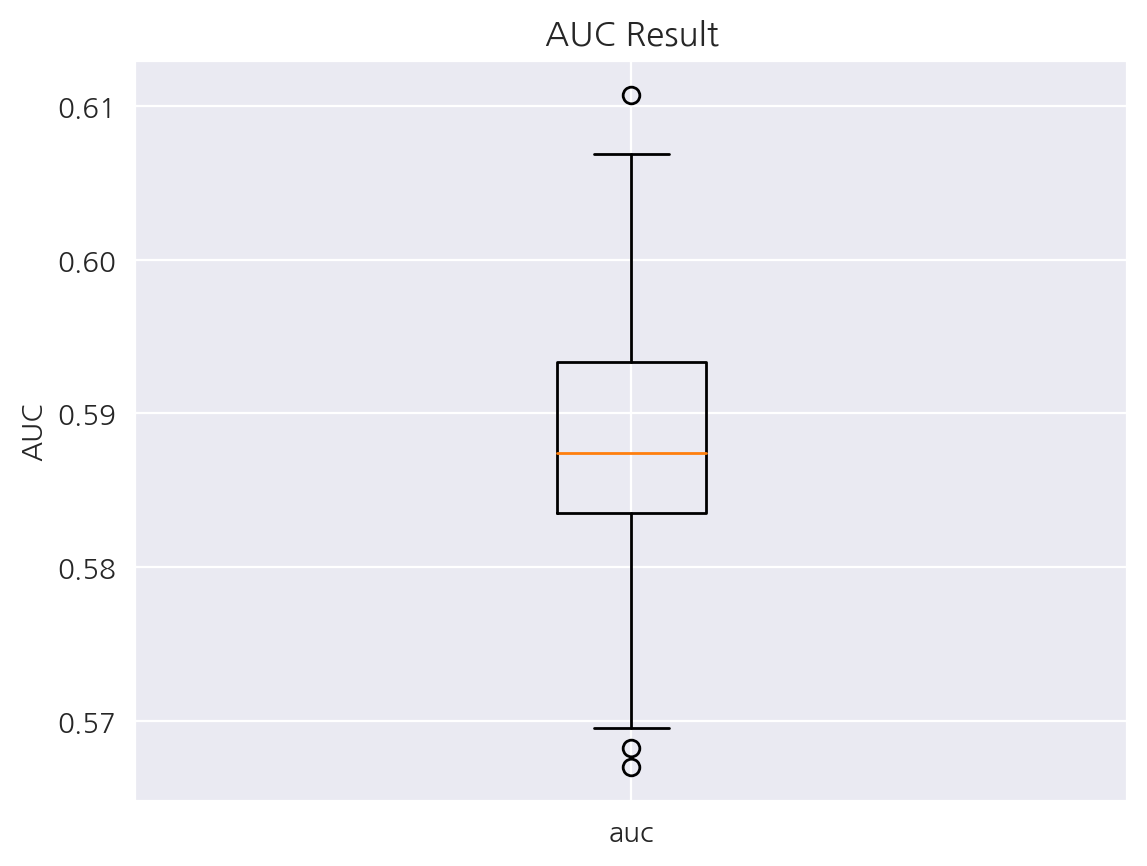

In [20]:
# boxplot 그리기
plt.boxplot(results['auc'])

# 그래프에 레이블 추가
plt.xticks([1], ['auc'])  # x축 레이블 설정
plt.ylabel('AUC')  # y축 레이블 설정
plt.title('AUC Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

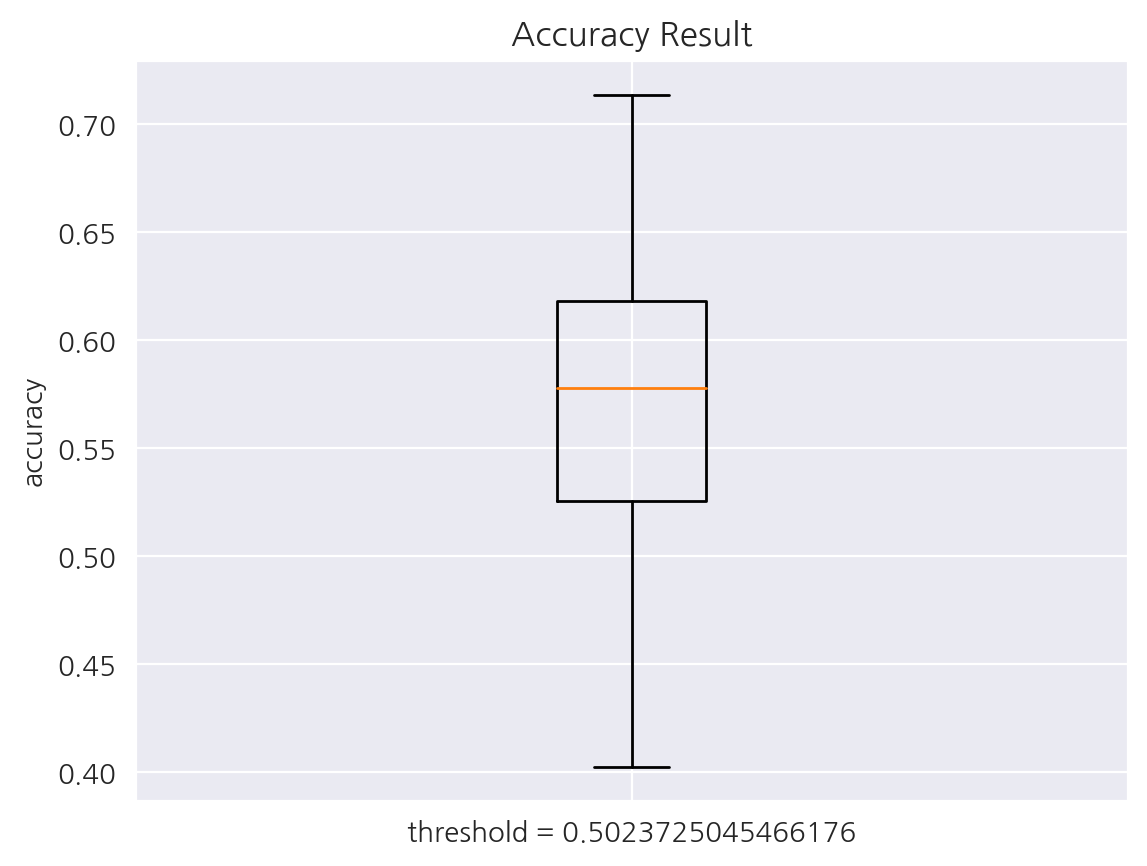

In [21]:
# boxplot 그리기
plt.boxplot(results['opt_accuracy'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('accuracy')  # y축 레이블 설정
plt.title('Accuracy Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

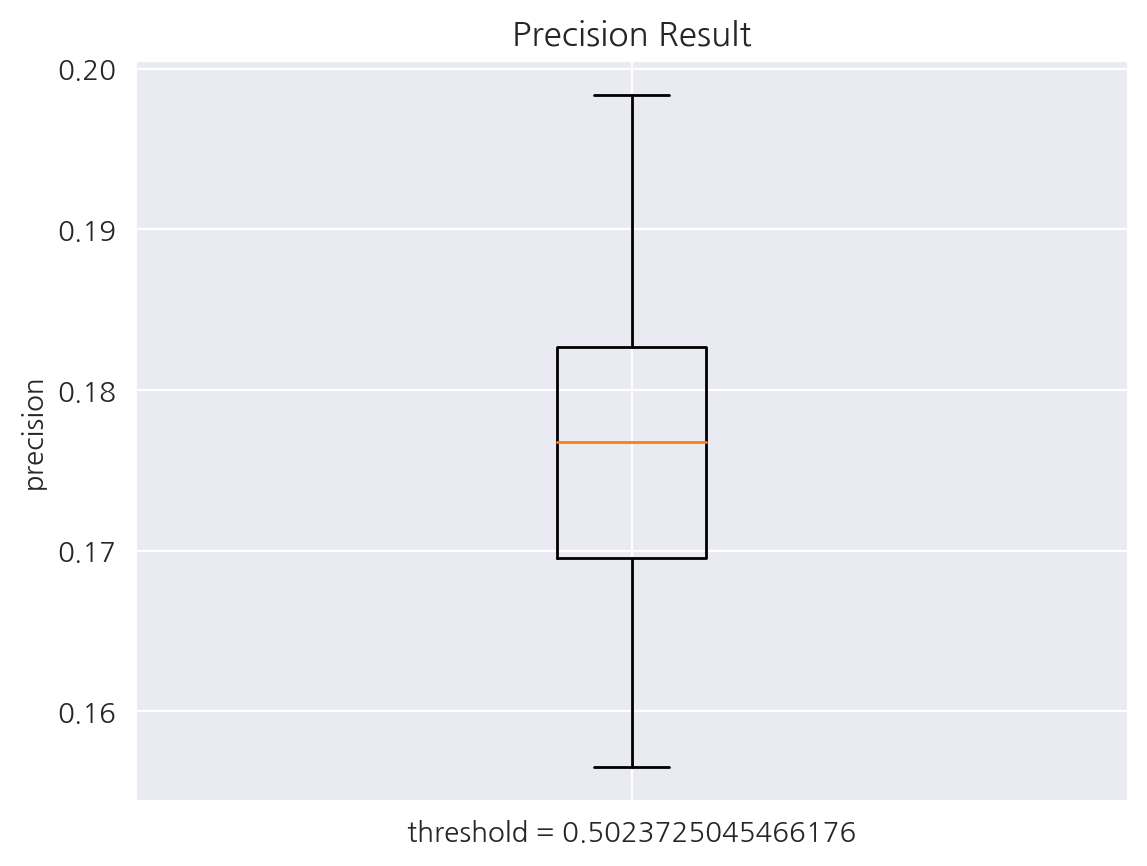

In [22]:
# boxplot 그리기
plt.boxplot(results['opt_precision'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('precision')  # y축 레이블 설정
plt.title('Precision Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

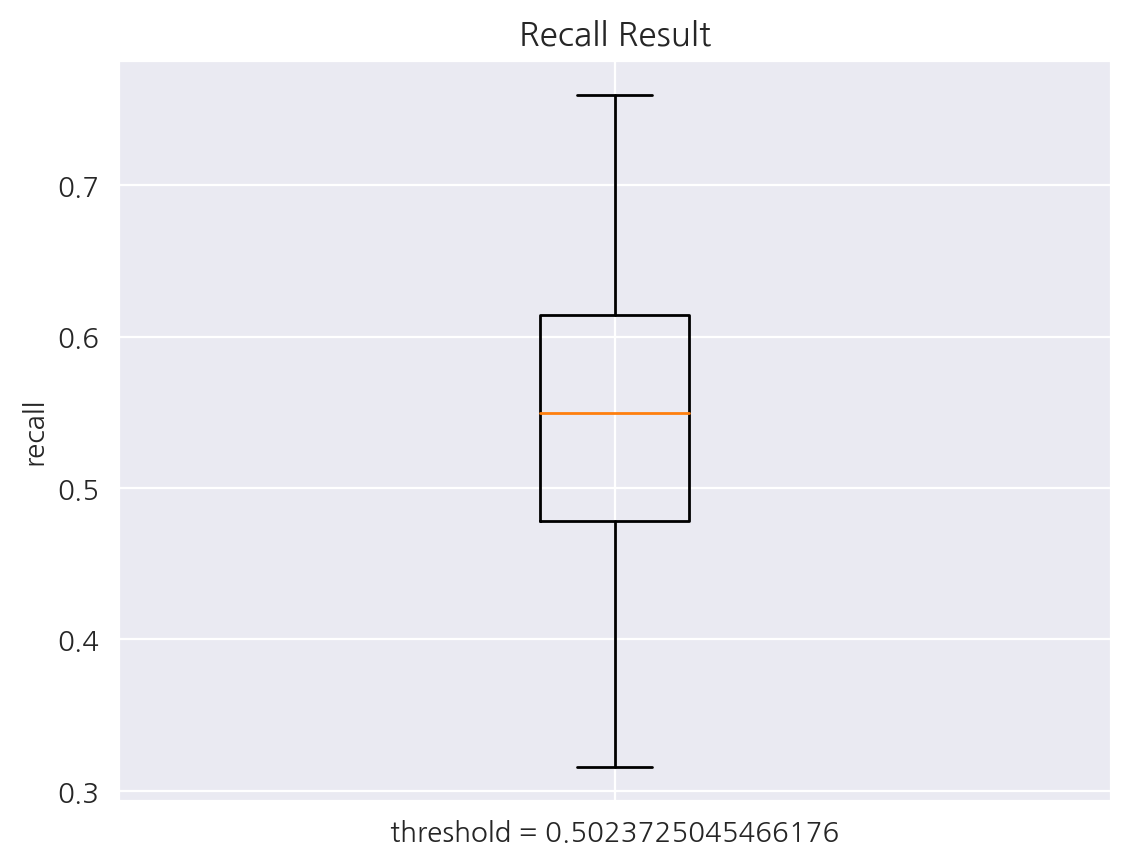

In [23]:
# boxplot 그리기
plt.boxplot(results['opt_recall'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('recall')  # y축 레이블 설정
plt.title('Recall Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

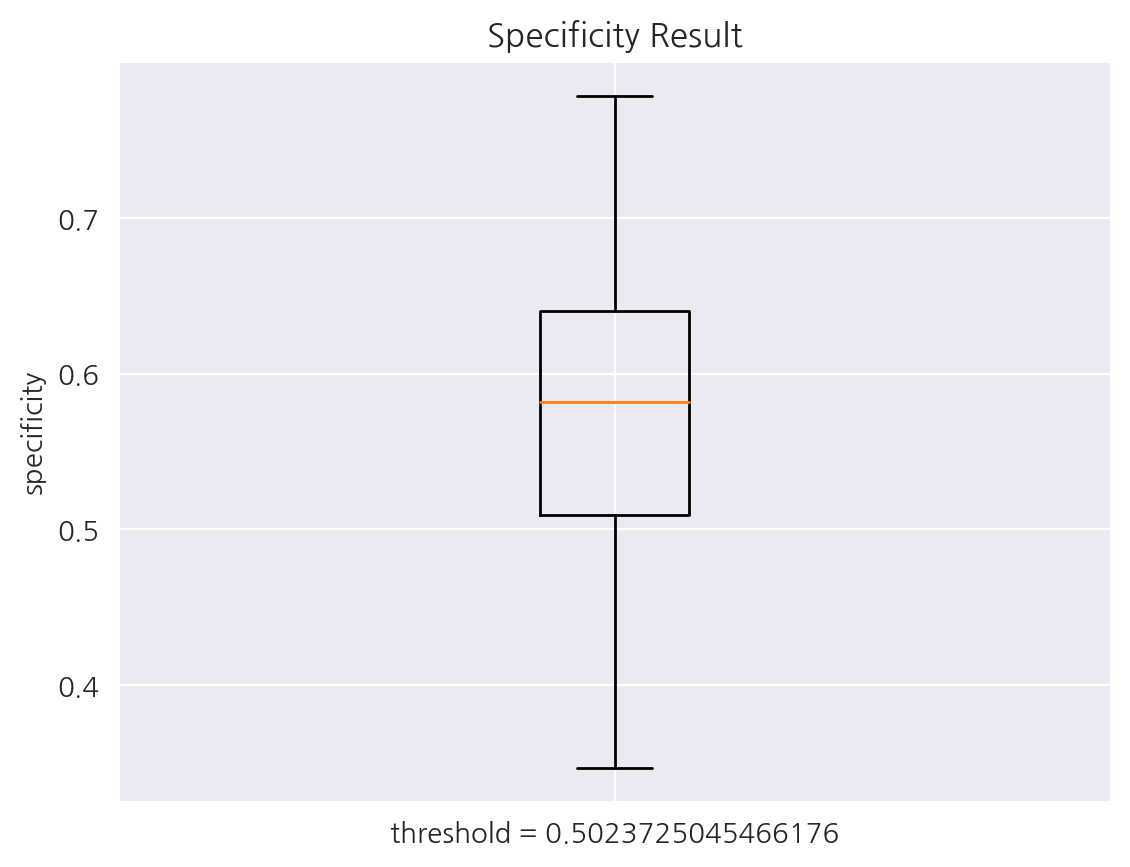

In [24]:
# boxplot 그리기
plt.boxplot(results['opt_specificity'])

# 그래프에 레이블 추가
plt.xticks([1], [f'threshold = {thres_value}'])  # x축 레이블 설정
plt.ylabel('specificity')  # y축 레이블 설정
plt.title('Specificity Result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()

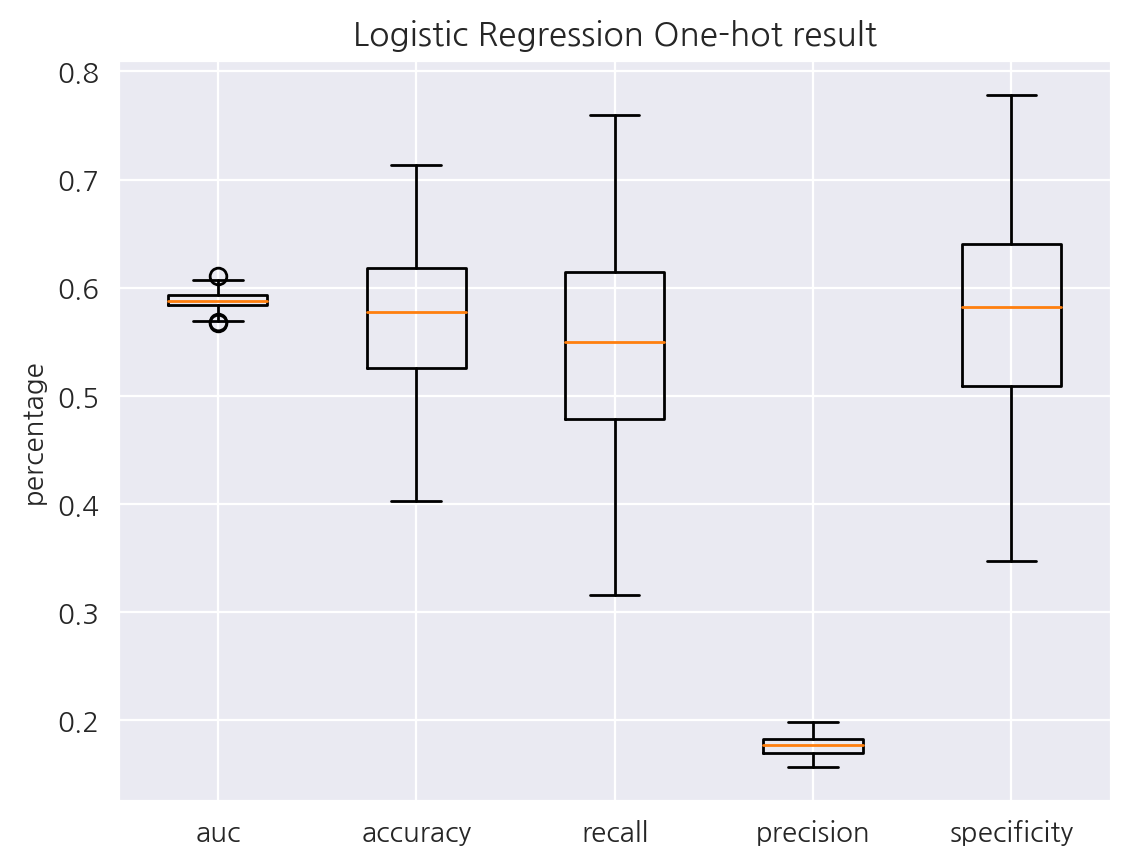

In [25]:
# 전체 boxplot 그리기
plt.boxplot([results['auc'], results['opt_accuracy'], results['opt_recall'], results['opt_precision'], results['opt_specificity']])

# 그래프에 레이블 추가
plt.xticks([1, 2, 3, 4, 5], ['auc', 'accuracy', 'recall', 'precision', 'specificity'])  # x축 레이블 설정
plt.ylabel('percentage')  # y축 레이블 설정
plt.title('Logistic Regression One-hot result')  # 그래프 제목 설정

# 그래프 보여주기
plt.show()